<div id="key-results" class="topic concept mtbconcept - jumplinks.flat " lang="en-US"><div class="titlebar"><h1 class="topicHeader">Interpret the key results for <span class="ph mtbcommand">ARIMA</span></h1><div class="promo"></div></div><div class="abstract"><span class="shortdesc">Complete the following steps to interpret an ARIMA analysis. Key output includes the p-value, coefficients, mean square error, Ljung-Box chi-square statistics, and the autocorrelation function of the residuals.</span> </div><div class="jumplinks"><h4>In This Topic</h4><ul class="jumplinkList"><li><a href="#step-1-determine-whether-each-term-in-the-model-is-significant">Step 1: Determine whether each term in the model is significant</a></li><li><a href="#step-2-determine-how-well-the-model-fits-the-data">Step 2: Determine how well the model fits the data</a></li><li><a href="#step-3-determine-whether-your-model-meets-the-assumption-of-the-analysis">Step 3: Determine whether your model meets the assumption of the analysis</a></li></ul><div class="clearing"></div></div><div id="step-1-determine-whether-each-term-in-the-model-is-significant" class="topic concept mtbconcept" lang="en-US"><h2 class="title topictitle2" id="ariaid-title2">Step 1: Determine whether each term in the model is significant</h2>
<div class="body conbody mtbconbody"> 
<div class="p"> To determine whether the association between the response and each term in the model is statistically significant, compare the p-value for the term to your significance level to assess the null hypothesis. The null hypothesis is that the term is not significantly different from 0, which indicates that no association exists between the term and the response. Usually, a significance level (denoted as α or alpha) of 0.05 works well. A significance level of 0.05 indicates a 5% risk of concluding that the term is not significantly different from 0 when it is significantly different from 0. 
<dl class="dl"> 
 
<dt class="dt dlterm first"> <strong class="ph b"> P-value ≤ α: The term is statistically significant</strong> </dt> 
<dd class="dd"> If the p-value is less than or equal to the significance level, you can conclude that the coefficient is statistically significant. </dd>
  
 
<dt class="dt"> <strong class="ph b"> P-value &gt; α: The term is not statistically significant</strong> </dt> 
<dd class="dd"> If the p-value is greater than the significance level, you cannot conclude that the coefficient is statistically significant. You may want to refit the model without the term. </dd>
  </dl> </div> 

![image.png](attachment:image.png)
   
 <h6>Key Results: P, Coef</h6><p class="p"> The autoregressive term has a p-value that is less than the significance level of 0.05. You can conclude that the coefficient for the autoregressive term is statistically significant, and you should keep the term in the model.</p></figcaption></figure>
 </div></div><div id="step-2-determine-how-well-the-model-fits-the-data" class="topic concept mtbconcept" lang="en-US"><h2 class="title topictitle2" id="ariaid-title3">Step 2: Determine how well the model fits the data</h2>
<div class="body conbody mtbconbody"> 
<p class="p">Use the mean square error (MS) to determine how well the model fits the data. Smaller values indicate a better fitting model.</p> 
    
![image-2.png](attachment:image-2.png)

<h6>Key Results: MS</h6><p class="p"> The mean square error is 6.323 for this model. This value is not very informative by itself, but you can use it to compare the fits of different ARIMA models.</p></figcaption></figure>
 </div></div><div id="step-3-determine-whether-your-model-meets-the-assumption-of-the-analysis" class="topic concept mtbconcept" lang="en-US"><h2 class="title topictitle2" id="ariaid-title4">Step 3: Determine whether your model meets the assumption of the analysis</h2>
<div class="body conbody mtbconbody"> 
<div class="p"> Use the Ljung-Box chi-square statistics and the autocorrelation function of the residuals to determine whether the model meets the assumptions that the residuals are independent. If the assumption is not met, the model may not fit the data and you should use caution when you interpret the results. 
<dl class="dl"> 
 
<dt class="dt dlterm first"> Ljung-Box chi-square statistics</dt> 
<dd class="dd">To determine whether the residuals are independent, compare the p-value to the significance level for each chi square statistic. Usually, a significance level (denoted as α or alpha) of 0.05 works well. If the p-value is greater than the significance level, you can conclude that the residuals are independent and that the model meets the assumption.</dd>
 
 
<dt class="dt"> Autocorrelation function of the residuals</dt> 
<dd class="dd"> If no significant correlations are present, you can conclude that the residuals are independent. However, you may see 1 or 2 significant correlations at higher order lags that are not seasonal lags. These correlations are usually caused by random error instead and are not a sign that the assumption is not met. In this case, you can conclude that the residuals are independent.</dd>
</dl></div> 
<figure class="fig fignone"><div class="swoutput"><h3 class="swotitle">ARIMA Model: Trade
</h3>
    
![image-3.png](attachment:image-3.png)    
    
<div class="swotable">
<h3 class="swotitle">Number of observations:  60
</h3>

![image-4.png](attachment:image-4.png)
    
</div></div><figcaption><h6>Key Results: P-Value, ACF of Residuals</h6><p class="p"> In these results, the p-values for the Ljung-Box chi-square statistics are all greater than 0.05 and none of the correlations for the autocorrelation function of the residuals are significant. You can conclude that the model meets the assumption that the residuals are independent.</p></figcaption></figure>
 </div></div></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("shampoo.csv")

In [3]:
data.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


<AxesSubplot:>

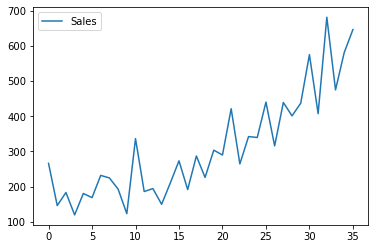

In [4]:
data.plot()

In [5]:
#check if stationaru or not

from statsmodels.tsa.stattools import adfuller

In [6]:
res = adfuller (data.Sales)

In [7]:
pval = res[1]

if pval < 0.05:
    print("stationary")
else:
    print("not stationary")

not stationary


In [8]:
data_diff = data.Sales.diff()

In [9]:
data_diff2 = data.Sales.diff().diff()

<AxesSubplot:>

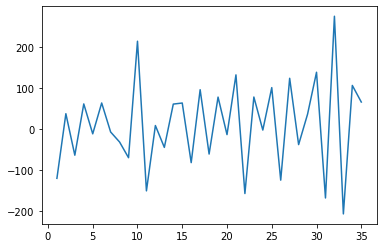

In [10]:
data_diff.plot()

In [11]:
res = adfuller (data_diff.dropna())
pval = res[1]

if pval < 0.05:
    print("stationary")
else:
    print("not stationary")

stationary


<AxesSubplot:>

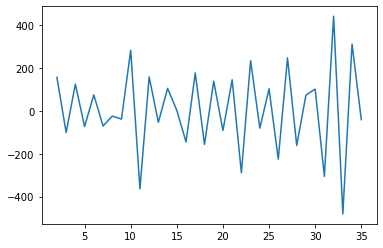

In [12]:
data_diff2.plot()

In [13]:
res = adfuller (data_diff2.dropna())
pval = res[1]

if pval < 0.05:
    print("stationary")
else:
    print("not stationary")

stationary


In [14]:
#d =1

In [15]:
#lag order
from statsmodels.graphics.tsaplots import plot_acf

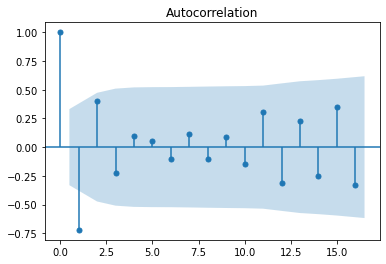

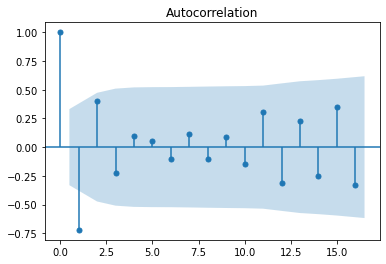

In [16]:
plot_acf(data_diff.dropna())

In [17]:
#lag order
from statsmodels.graphics.tsaplots import plot_pacf

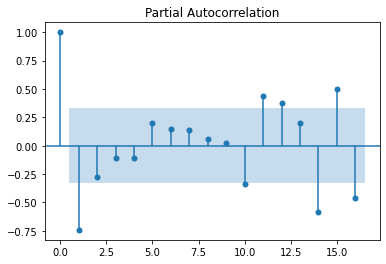

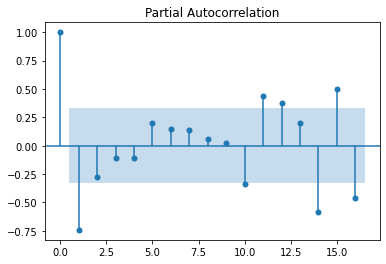

In [18]:
plot_pacf(data_diff.dropna())

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


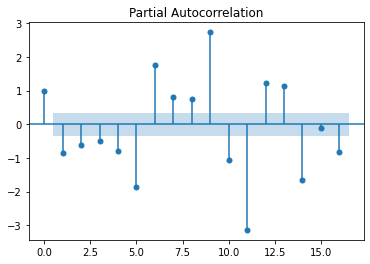

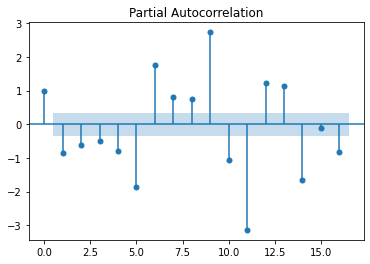

In [19]:
plot_pacf(data_diff2.dropna())

In [20]:
# diff =1, slect the lag order p = 1, q =1

In [21]:
# diff =2, slect the lag order p = 6,7, q =1

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
model = ARIMA(data.Sales, order = (7,2,1))
m=model.fit(disp = 0)

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

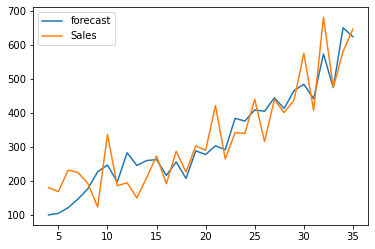

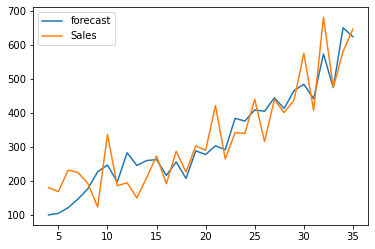

In [24]:
m.plot_predict(dynamic = False)

In [25]:
m.resid

2     156.408691
3      28.441420
4      80.592406
5      64.156216
6     110.715714
7      78.160775
8      16.208988
9    -103.839592
10     89.659448
11    -10.916930
12    -88.492980
13    -95.852992
14    -49.786735
15     10.637959
16    -24.739165
17     31.219021
18     18.570472
19     15.245734
20     12.309875
21    118.307572
22    -27.190557
23    -41.864182
24    -36.458408
25     31.342832
26    -89.181730
27     -5.120230
28    -12.305675
29    -28.526169
30     90.933535
31    -34.472251
32    108.246168
33      0.541030
34    -69.869775
35     22.317256
dtype: float64

<AxesSubplot:>

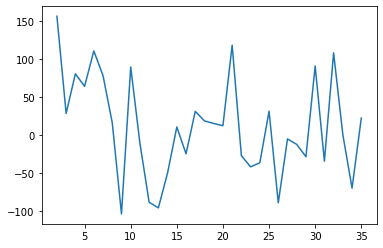

In [26]:
m.resid.plot()

<AxesSubplot:ylabel='Density'>

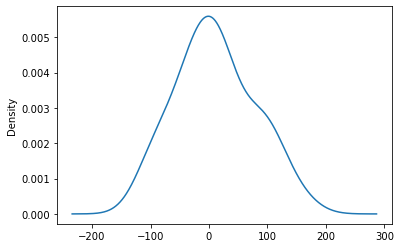

In [27]:
m.resid.plot(kind = "kde")

<AxesSubplot:ylabel='Frequency'>

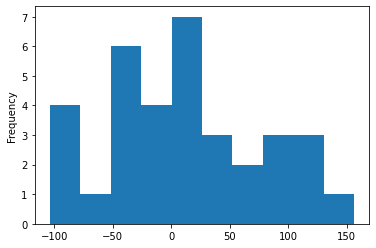

In [28]:
m.resid.plot(kind = "hist")